# Исследование эффективности различных методов преобразований признаков

Импорт библиотек и чтение данных:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from src.utils import get_features_transformation_info

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('../data/processed/train_dataset.csv')

In [6]:
df.head()

,YEARS_BIRTH,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,YEARS_EMPLOYED,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_FAMILY_STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,BAD_CLIENT
0,31.225829,F,92387.0,Working,7.176054,Core staff,Higher education,1,0,Single / not married,No,Yes,House / apartment,No,No,No,0
1,24.517957,F,90648.0,Working,2.603750,Sales staff,Secondary / secondary special,1,0,Single / not married,No,No,With parents,No,No,No,0
2,37.054833,M,138966.0,Working,7.000828,Laborers,Secondary / secondary special,4,2,Married,No,Yes,House / apartment,No,No,No,0
3,56.915611,F,181466.0,Pensioner,-0.002738,Unemployed,Secondary / secondary special,2,0,Married,No,Yes,House / apartment,No,No,No,0
4,52.102370,F,97226.0,Working,7.197958,Other Occupations,Higher education,1,0,Single / not married,No,Yes,Municipal apartment,No,No,No,0


Исследуется качество дефолтных моделей на кросс-валидации при различных методах feature engineering и feature selection. 

In [7]:
%%time
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
clf = LogisticRegression(random_state=0)
features_transformation_info = get_features_transformation_info(df=df, classifier=clf, cv=cv)

CPU times: total: 54 s
Wall time: 54.6 s


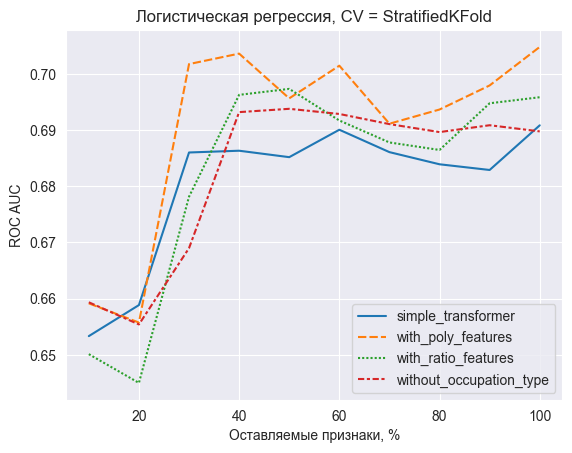

In [8]:
sns.lineplot(data=features_transformation_info)
plt.title("Логистическая регрессия, CV = StratifiedKFold")
plt.xlabel("Оставляемые признаки, %")
plt.ylabel("ROC AUC");

In [9]:
%%time
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
clf = RandomForestClassifier(random_state=0)
features_transformation_info = get_features_transformation_info(df=df, classifier=clf, cv=cv)

CPU times: total: 6min 21s
Wall time: 7min 8s


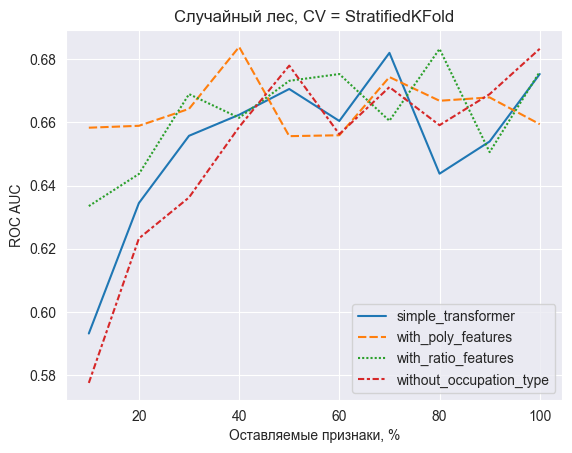

In [10]:
sns.lineplot(data=features_transformation_info)
plt.title("Случайный лес, CV = StratifiedKFold")
plt.xlabel("Оставляемые признаки, %")
plt.ylabel("ROC AUC");

In [11]:
%%time
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
clf = LGBMClassifier(random_state=0)
features_transformation_info = get_features_transformation_info(df=df, classifier=clf, cv=cv)

CPU times: total: 6min 2s
Wall time: 2min 23s


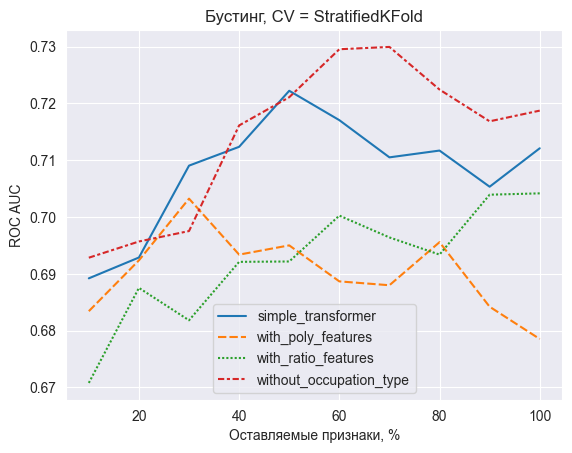

In [12]:
sns.lineplot(data=features_transformation_info)
plt.title("Бустинг, CV = StratifiedKFold")
plt.xlabel("Оставляемые признаки, %")
plt.ylabel("ROC AUC");

Полученные значения ROC обладают высокой дисперсией, что приводит к большим скачкам на полученных кривых и трудностям оценки наилучшего метода преобразования признаков. Для уменьшения дисперсии рассмотрим использование RepeatedKFold.

In [13]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
clf = LogisticRegression(random_state=0)
features_transformation_info = get_features_transformation_info(df=df, classifier=clf, cv=cv)

CPU times: total: 3min 51s
Wall time: 3min 43s


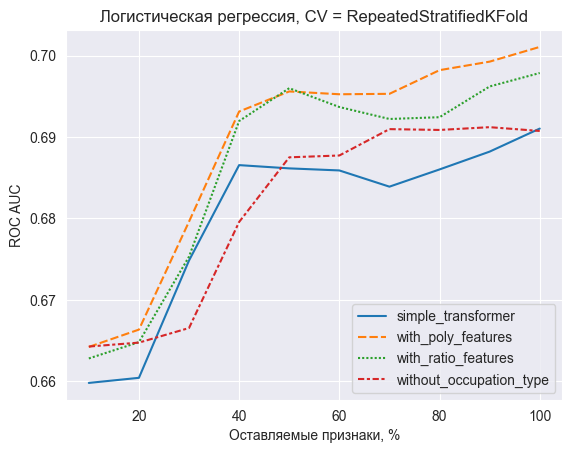

In [14]:
sns.lineplot(data=features_transformation_info)
plt.title("Логистическая регрессия, CV = RepeatedStratifiedKFold")
plt.xlabel("Оставляемые признаки, %")
plt.ylabel("ROC AUC");

In [15]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
clf = RandomForestClassifier(random_state=0)
features_transformation_info = get_features_transformation_info(df=df, classifier=clf, cv=cv)

CPU times: total: 30min 43s
Wall time: 33min 10s


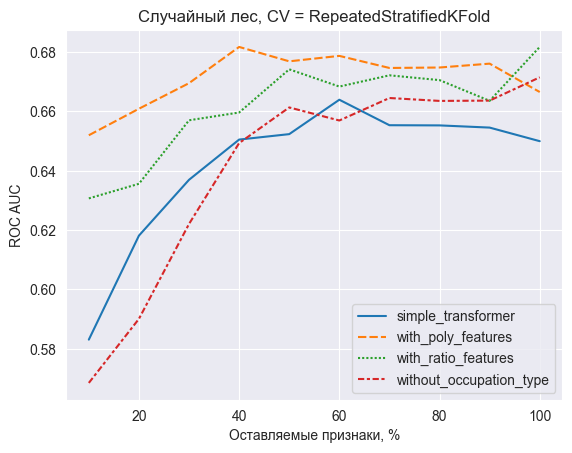

In [16]:
sns.lineplot(data=features_transformation_info)
plt.title("Случайный лес, CV = RepeatedStratifiedKFold")
plt.xlabel("Оставляемые признаки, %")
plt.ylabel("ROC AUC");

In [17]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
clf = LGBMClassifier(random_state=0)
features_transformation_info = get_features_transformation_info(df=df, classifier=clf, cv=cv)

CPU times: total: 29min 18s
Wall time: 9min 1s


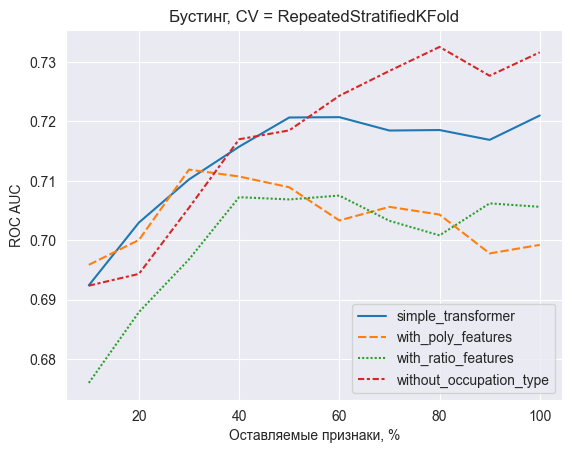

In [18]:
sns.lineplot(data=features_transformation_info)
plt.title("Бустинг, CV = RepeatedStratifiedKFold")
plt.xlabel("Оставляемые признаки, %")
plt.ylabel("ROC AUC");

По результатам исследования, наилучший результат достигается при использовании бустинга на всех фичах, кроме *occupation_type*.